# Medical Charges Prediction 

### Imports

In [12]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('D:/Study/Placement/Project/2_MedicalTreatment/insurance.csv')

from sklearn.preprocessing import LabelEncoder

Today we will explore a data set dedicated to the cost of treatment of  **different patients**.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.

In [13]:
data.shape

(1338, 7)

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [25]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  But in this case, nothing will change, because there is no special order in which the regions would be listed. So I'm being very lazy only used the Label Encoder.

### Correlation

In [26]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [27]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [28]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


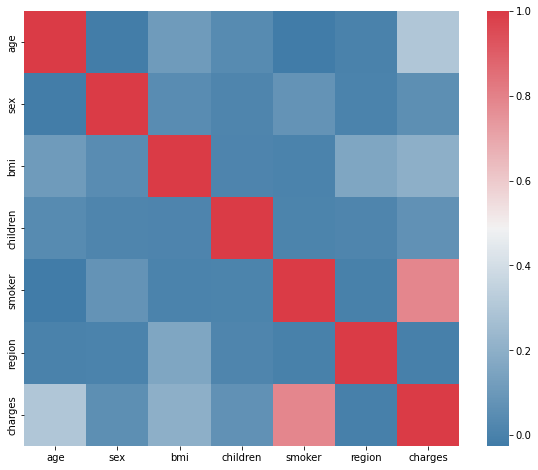

In [54]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

pl.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> A strong correlation is observed only with the fact of smoking the patient.   </li>
    </ul>
</div>

### The Distribution of Charges

In [30]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB",width=400, height=400)
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(p)
#gridplot(p, plot_width=400, plot_height=400, toolbar_location=None)

Loading BokehJS ...

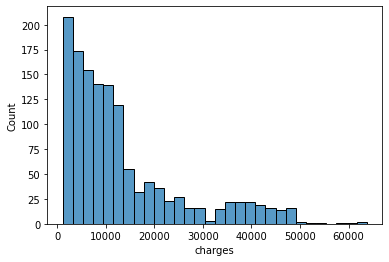

In [53]:
sns.histplot(data.charges)

pl.show()

### The Distribution of Charges: Smoker vs Non-Smoker

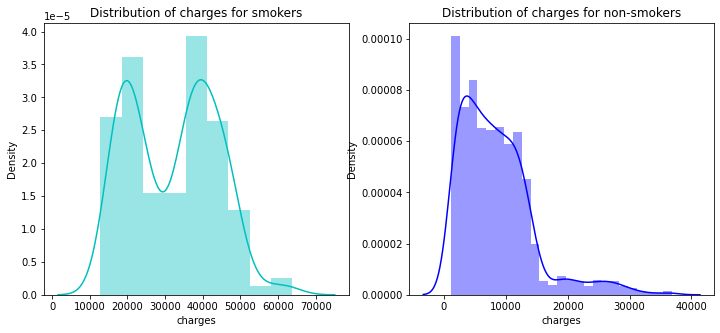

In [52]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

pl.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> Smoking patients spend more on treatment. |</li>
    </ul>
</div>

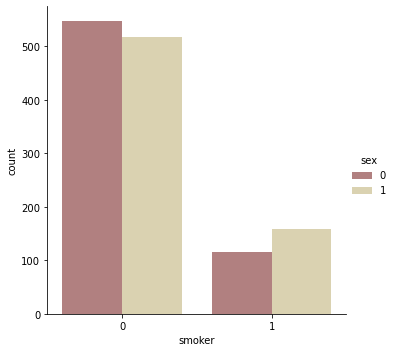

In [51]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

pl.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <br>Please note that women are coded with the symbol " 0 "and men "1"
    <ul>
        <li> Non-smoking people are more in number. </li>
        <li> Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. (will check later) </li>
    </ul>
</div>

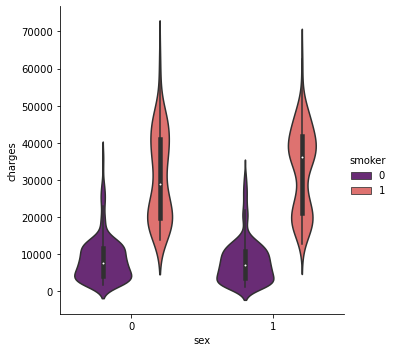

In [50]:
sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=data, palette = 'magma')

pl.show()

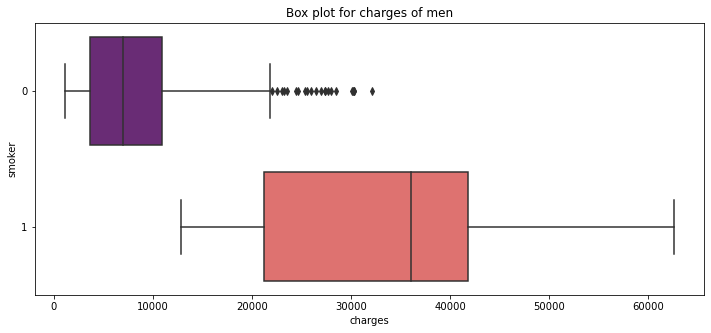

In [49]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

pl.show()

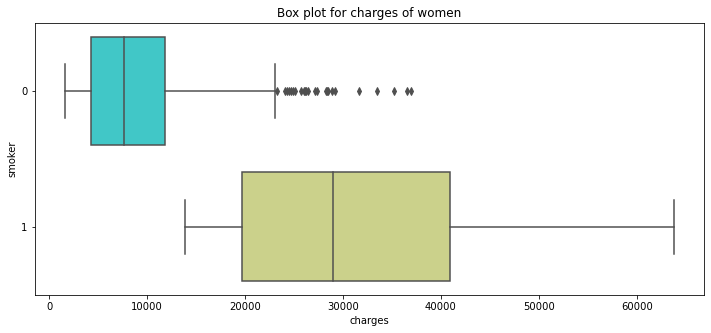

In [48]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

pl.show()

Now let's pay attention to the age of the patients.  First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

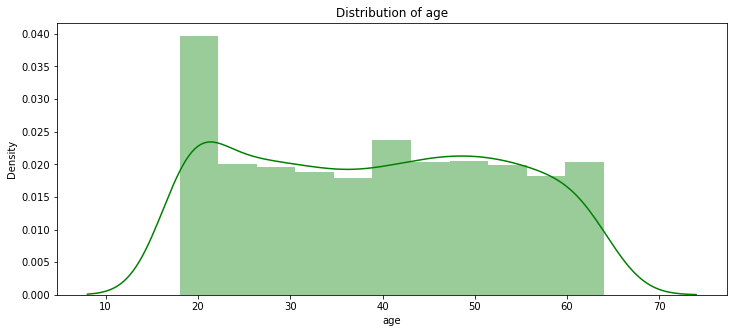

In [37]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

### Smokers with age: 18

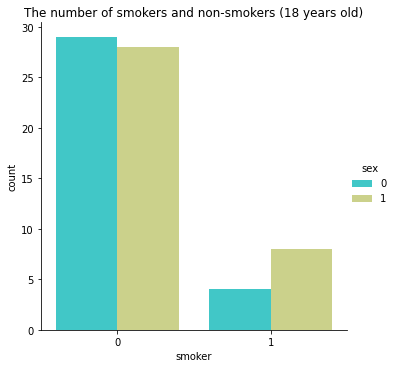

In [47]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

pl.show()

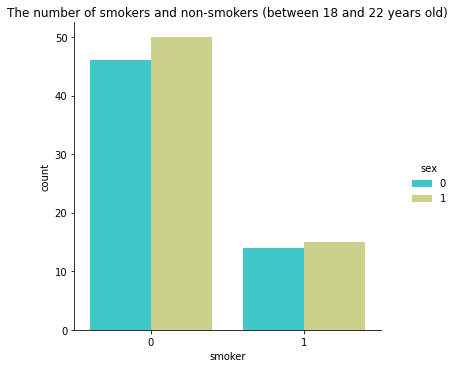

In [39]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age > 18) & (data.age < 22)])
pl.title("The number of smokers and non-smokers (between 18 and 22 years old)")
pl.show()

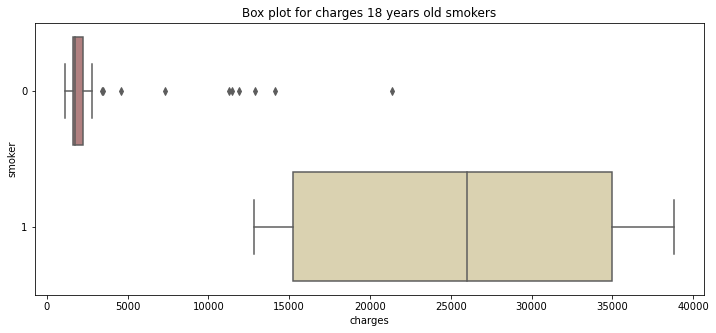

In [40]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')
pl.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> Even at the age of 18 smokers spend much more on treatment than non-smokers. </li>
        <li> Among non-smokers we are seeing some " tails." I can guess that this is due to serious diseases or accidents. </li>
    </ul>
</div>

### How the cost of treatment depends on the age of smokers and non-smokers patients:

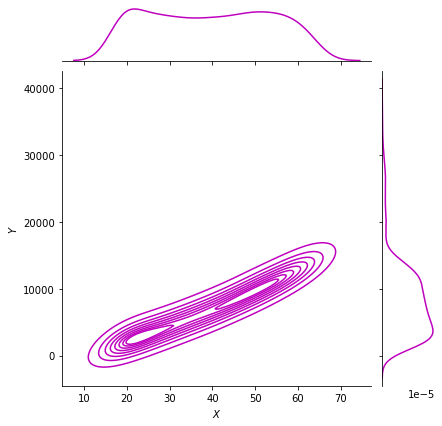

In [46]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

pl.show()

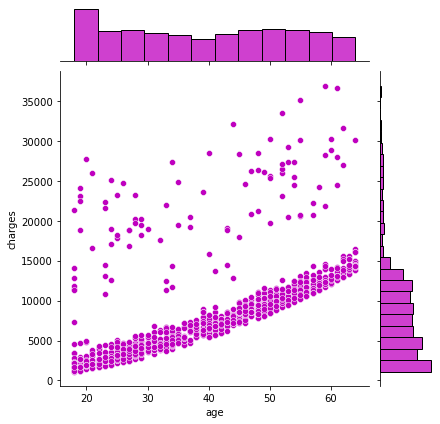

In [45]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="scatter", color="m")
# g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
# g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

pl.show()

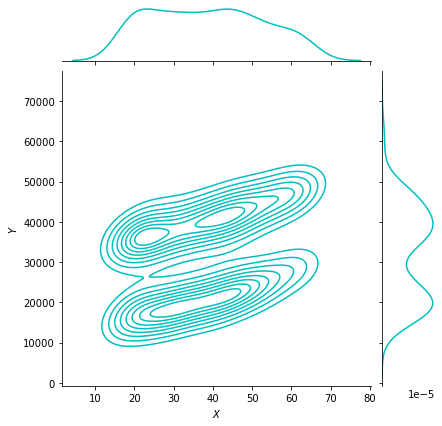

In [44]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')
pl.show()

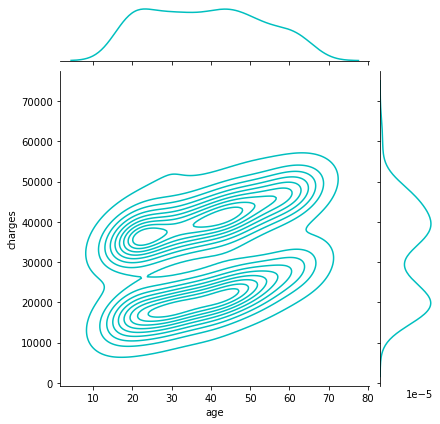

In [43]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
ax.set_title('Distribution of charges and age for smokers')
pl.show()

In [25]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [26]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

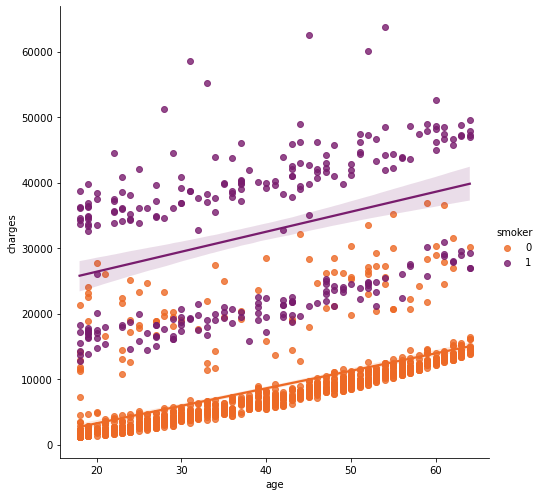

In [55]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

pl.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> In non-smokers, the cost of treatment increases with age. </li>
    </ul>
</div>

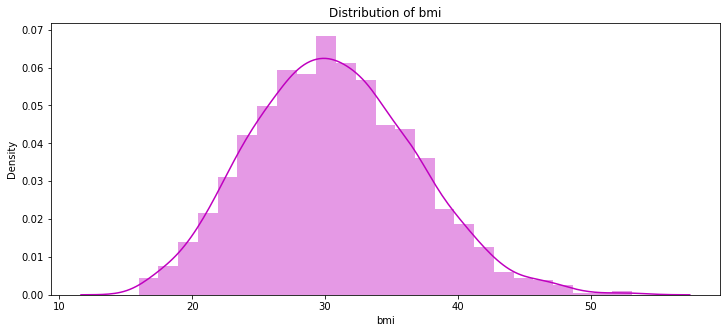

In [28]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> The average BMI in patients is 30.</li>
    </ul>
</div>


![![image.png](attachment:image.png)](http://1j4g1pasf991x0osxuqz6d10.wpengine.netdna-cdn.com/wp-content/uploads/2017/03/BMI-CHART-1024x791.png)
#### With a value equal to 30 starts obesity.

#### Let's look at the distribution of costs in patients with BMI greater than 30 and less than 30

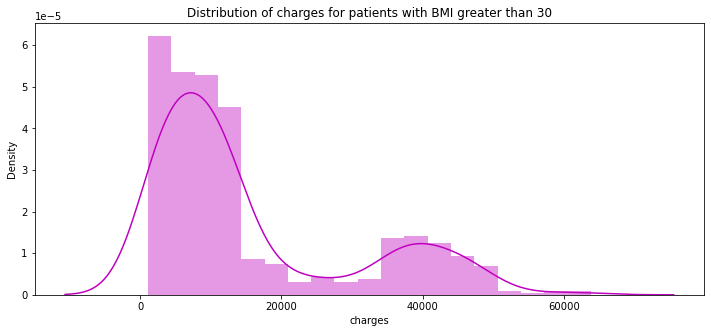

In [29]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

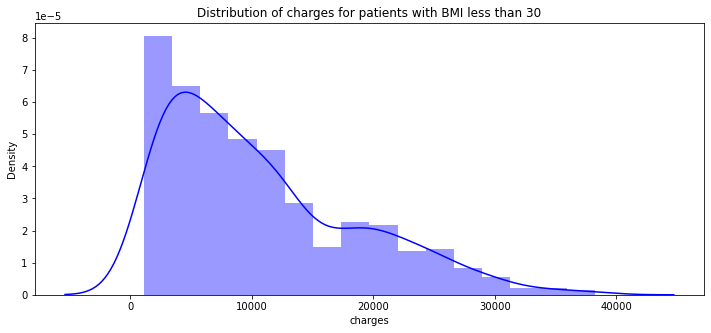

In [30]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> Patients with BMI above 30 spend more on treatment!</li>
    </ul>
</div>

Text(0.5, 1.0, 'Distribution of bmi and charges')

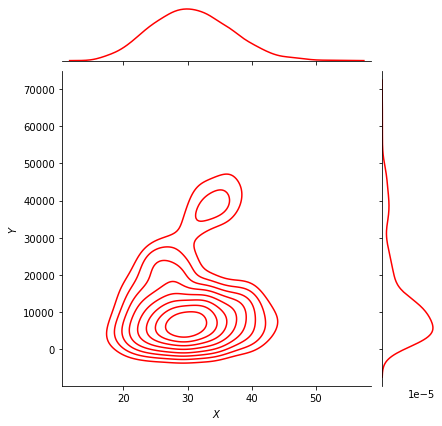

In [31]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


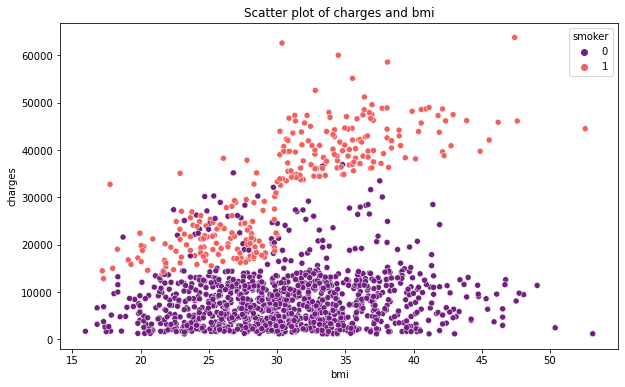

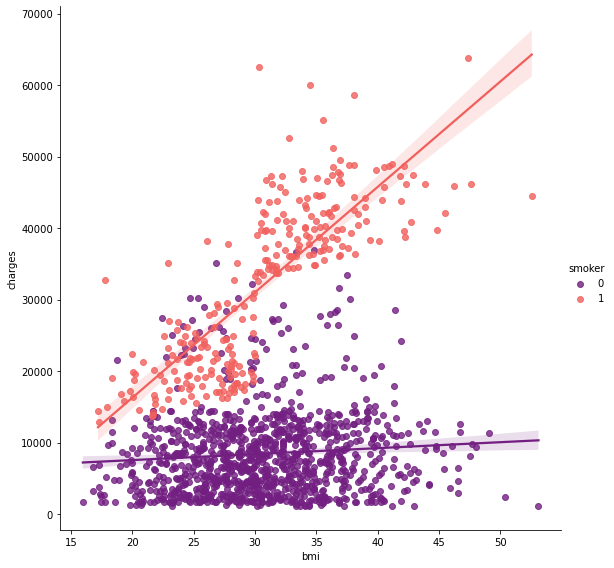

In [32]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

#### Let's see how many children our patients have.


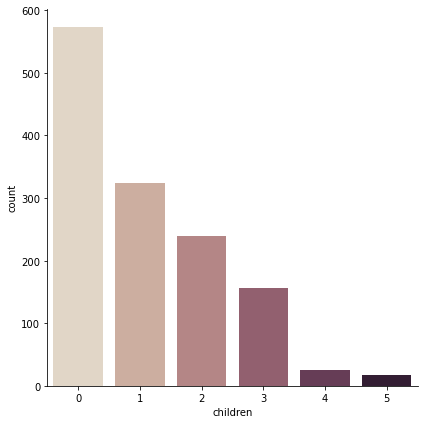

In [33]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

#### Most patients do not have children. I want to check if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

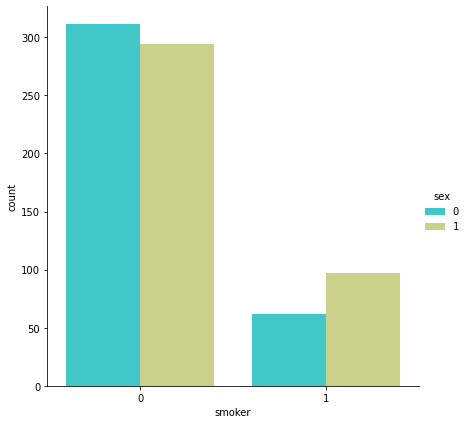

In [34]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

## Prediction 

### Imports

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

### Linear Regression 

In [59]:
x = data.drop(['charges'], axis = 1)
y = data.charges

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [62]:
r2_score(y_test,y_test_pred)

0.7962732059725786

### Polynomial Regression

In [64]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

In [65]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


In [55]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [66]:
pd.DataFrame(x_quad)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,19.0,0.0,27.900,0.0,1.0,361.0,0.0,530.100,0.0,...,0.0,0.000,0.0,0.0,778.410000,0.00,27.90,0.0,0.0,1.0
1,1.0,18.0,1.0,33.770,1.0,0.0,324.0,18.0,607.860,18.0,...,1.0,33.770,1.0,0.0,1140.412900,33.77,0.00,1.0,0.0,0.0
2,1.0,28.0,1.0,33.000,3.0,0.0,784.0,28.0,924.000,84.0,...,1.0,33.000,3.0,0.0,1089.000000,99.00,0.00,9.0,0.0,0.0
3,1.0,33.0,1.0,22.705,0.0,0.0,1089.0,33.0,749.265,0.0,...,1.0,22.705,0.0,0.0,515.517025,0.00,0.00,0.0,0.0,0.0
4,1.0,32.0,1.0,28.880,0.0,0.0,1024.0,32.0,924.160,0.0,...,1.0,28.880,0.0,0.0,834.054400,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1.0,50.0,1.0,30.970,3.0,0.0,2500.0,50.0,1548.500,150.0,...,1.0,30.970,3.0,0.0,959.140900,92.91,0.00,9.0,0.0,0.0
1334,1.0,18.0,0.0,31.920,0.0,0.0,324.0,0.0,574.560,0.0,...,0.0,0.000,0.0,0.0,1018.886400,0.00,0.00,0.0,0.0,0.0
1335,1.0,18.0,0.0,36.850,0.0,0.0,324.0,0.0,663.300,0.0,...,0.0,0.000,0.0,0.0,1357.922500,0.00,0.00,0.0,0.0,0.0
1336,1.0,21.0,0.0,25.800,0.0,0.0,441.0,0.0,541.800,0.0,...,0.0,0.000,0.0,0.0,665.640000,0.00,0.00,0.0,0.0,0.0


### Random Forest Regression

In [70]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_score(y_train,forest_train_pred),
                                                   r2_score(y_test,forest_test_pred)))

MSE train data: 3739930.225, MSE test data: 20050668.515
R2 train data: 0.974, R2 test data: 0.873


### Residual Behaviour 

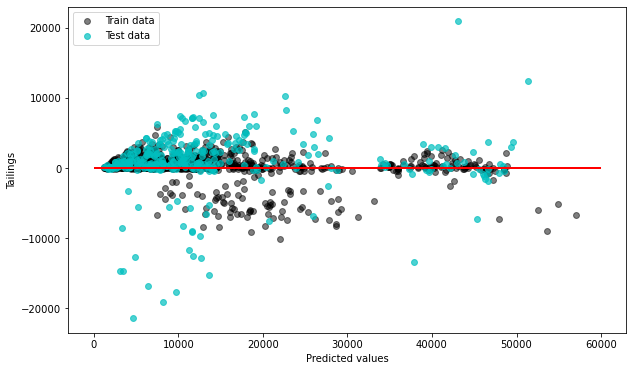

In [71]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

In [77]:
lst = [[r2_score(y_test,y_test_pred),r2_score(y_train,y_train_pred)],
       [r2_score(Y_test,Y_test_pred),r2_score(Y_train,Y_train_pred)],
       [r2_score(y_train,forest_train_pred),r2_score(y_test,forest_test_pred)]]
pd.DataFrame(lst,columns=['Train','Test'],index = ['Linear Regression','Polynomial Regression','Random Forest'])

,Train,Test
Linear Regression,0.796273,0.733716
Polynomial Regression,0.884920,0.827971
Random Forest,0.973827,0.872641
